# Trabalho Final: Redes Neurais

**Professor:** Daniel Roberto Cassar

**Instituição:** ilum - Escola de ciência, CNPEM

## Sobre este notebook:

- Este notebook é uma apresentação dos passos que nos levaram a rede final (presente em outro documento anexado neste github). Logo, as redes aqui presentes podem ser muito úteis para você, caso queira resolver problemas menores ou deseje uma rede de base para seu projeto.

Aqui estão as quatro códigos que geramos antes de nossa versão final, que mostram nosso desenvolvimento do código:

**Rede 1:** utiliza a biblioteca `sklearn` para gerar uma rede simples e compacta, mas aqui não vemos muito da magia das redes neurais, além de ser limitada em possibilidades. Muito útil para uma pequena tarefa

**Rede 2:** Aqui temos o nosso uso do pytorch que gera uma MLP de uma camada oculta. Ela é interessante, bem editável e plota o loss acada 10 épocas, permitindo a grande edição e participação do programador. Muito útil de base para um projeto futuro.

**Rede 3:** Aqui iteramos a _Rede 2_ em alguns hiperparâmetros definidos em uma célula separada. Essa iteração permite gerar um dataset com todas as combinações de redes possíveis com os hiperparâmetros definidos. A última célula coleta e compara os RMSEs. Muito útil para buscar os melhores parâmetros para uma MLP.

**Rede 4:** A versão final é a _Rede 3_ com mais possibilidades de camadas, implementação do dropout, validação cruzada para evitar overfitting e para deixar a rede mais robusta.


## Rede 1: `sklearn`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('concrete.csv')
df.dropna(inplace=True)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Atributos e target
X = df[["cement", "slag", "ash", "water", "superplastic", "coarseagg", "fineagg", "age"]]
y = df["strength"]

# Split de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.04, random_state=10)

# Normalização
normalizador = StandardScaler()
X_treino_normalizado = normalizador.fit_transform(X_treino)
X_teste_normalizado = normalizador.transform(X_teste)

# Criação do modelo MLP
mlp = MLPRegressor(hidden_layer_sizes=(64, 50, 20),
                   activation='tanh',
                   solver='adam',
                   max_iter= 2000,
                   learning_rate_init=0.008,
                   random_state= 10)

# Treinamento
mlp.fit(X_treino_normalizado, y_treino)

# Predição do teste
y_pred = mlp.predict(X_teste_normalizado)

# Erro
mse = mean_squared_error(y_teste, y_pred)
print("RMSE", mse ** (1/2))

RMSE 2.880498342911891


Text(0.5, 1.0, 'Valor dos preços reais x preditos')

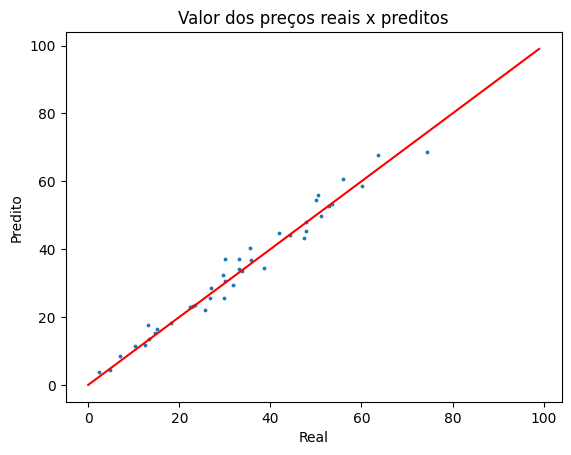

In [15]:
reta = []
for i in range(100):
    reta.append(i)

plt.scatter(y_teste, y_pred, s=3)
plt.plot(reta, reta, color='red')
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Valor dos preços reais x preditos')

## Rede 2: Pytorch

In [2]:
import torch                                                #pytorch
import torch.nn as nn                                       #redes neurais
import torch.optim as optim                                 #otimização
import pandas as pd                                         #litura do csv
import matplotlib.pyplot as plt                             #Adicionado para plotagem
from sklearn.model_selection import train_test_split        #divide treino e teste
from sklearn.preprocessing import StandardScaler            #nornalização (dados-média/desvio)
from sklearn.model_selection import cross_val_score         #valiodação cruzada
from sklearn.metrics import make_scorer, mean_squared_error #análise da valodação cruzada

In [3]:
# Carregar os dados do CSV
data = pd.read_csv('concrete.csv')

In [4]:
# Separar features (X) e labels (y)
X = data.drop(columns=["cement", "slag", "ash", "water", "superplastic", "coarseagg", "fineagg", "age"])
y = data['strength']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Converter para tensores PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

In [11]:
# Definir a arquitetura da rede MLP
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.Tanh()                   #função de ativação por tangente hiperbólica
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

In [9]:
# Parâmetros da rede
input_size = X_train.shape[1]
hidden_size = 128
output_size = len(y.unique())  # Número de classes

In [12]:
# Criar a rede
model = MLP(input_size, hidden_size, output_size)

In [15]:
# Definir a função de custo e o otimizador
criterion = nn.CrossEntropyLoss()                  #MSE sempre cai em um mínimo local prejudicial 
optimizer = optim.Adam(model.parameters(), lr=0.2) #otimizador Adam para maior convergêncoia

In [16]:
# Treinamento da rede
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

Epoch [10/100], Loss: 10.534173965454102
Epoch [20/100], Loss: 7.220095157623291
Epoch [30/100], Loss: 3.239974021911621
Epoch [40/100], Loss: 2.039337158203125
Epoch [50/100], Loss: 1.6247215270996094
Epoch [60/100], Loss: 1.2975404262542725
Epoch [70/100], Loss: 1.0202099084854126
Epoch [80/100], Loss: 0.9485558271408081
Epoch [90/100], Loss: 0.9011078476905823
Epoch [100/100], Loss: 0.8759686350822449


In [17]:
# Avaliação do modelo
with torch.no_grad():
    model.eval()
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).sum().item() / len(y_test)
    print(f'Acurácia do modelo: {accuracy}')

Acurácia do modelo: 0.6601941747572816


In [18]:
mse = mean_squared_error(y_test, predicted)
print("RMSE:", mse ** (1/2))

RMSE: 0.6073977599851282


### Gráfico:

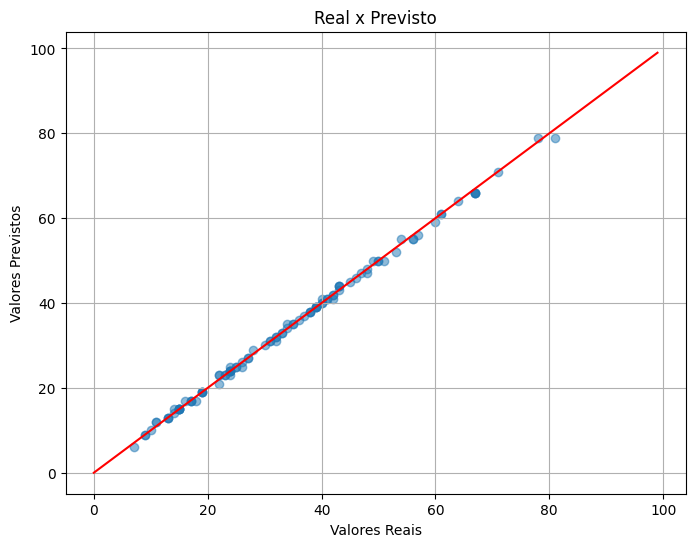

In [19]:
reta = []
for i in range(100):
    reta.append(i)

# Plotar valores reais versus previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted, alpha=0.5)
plt.plot(reta, reta, color='red')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Real x Previsto')
plt.grid(True)
plt.show()

## Rede 3: Análises de hiperparâmetros (versão primária):

In [21]:
import torch                                           # PyTorch
import torch.nn as nn                                  # Redes neurais
import torch.optim as optim                            # Otimização
import pandas as pd                                    
from sklearn.model_selection import train_test_split   # Divide treino e teste
from sklearn.preprocessing import StandardScaler       # Normalização (subtrai média e divide pelo desvio padrão)

# Carregar os dados do CSV
data = pd.read_csv('concrete.csv')

**Hiperparâmetros:**

In [22]:
# Hiperparâmetros editáveis
test_size = 0.1
random_state = 100                   # Definindo random_state como 100
lrs = [0.01, 0.025, 0.05]       # Definindo diferentes taxas de aprendi
epochs = [100, 50]        # Adicionando mais opções para número de épocas
hidden_sizes = [16, 32, 64, 128]     # Adicionando diferentes números de neurônios na camada oculta

In [23]:
# Separar features (X) e labels (y)
X = data.drop(columns=["cement", "slag", "ash", "water", "superplastic", "coarseagg", "fineagg", "age"])
y = data['strength']

# Dataframe para armazenar os resultados
results_df = pd.DataFrame(columns=['Test Size', 'Random State','Activation function', 'Learning Rate', 'Epochs', 'Hidden Size', 'Accuracy', 'RMSE'])

# Loop pelos hiperparâmetros

for lr in lrs:
    for num_epochs in epochs:
        for hidden_size in hidden_sizes:
            # Normalizar os dados
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)

            # Dividir os dados em conjuntos de treinamento e teste
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)

            # Converter para tensores PyTorch
            X_train = torch.tensor(X_train, dtype=torch.float32)
            y_train = torch.tensor(y_train.values, dtype=torch.long)
            X_test = torch.tensor(X_test, dtype=torch.float32)
            y_test = torch.tensor(y_test.values, dtype=torch.long)

            # Definir a arquitetura da rede MLP
            class MLP(nn.Module):
                def __init__(self, input_size, hidden_size, output_size):
                    super(MLP, self).__init__()
                    self.fc1 = nn.Linear(input_size, hidden_size)
                    self.activation = nn.ReLU()
                    self.fc2 = nn.Linear(hidden_size, output_size)

                def forward(self, x):
                    x = self.fc1(x)
                    x = self.activation(x)
                    x = self.fc2(x)
                    return x

            # Parâmetros da rede
            input_size = X_train.shape[1]
            output_size = len(y.unique())  # Número de classes

            # Criar a rede
            model = MLP(input_size, hidden_size, output_size)

            # Definir a função de custo e o otimizador
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)  # Otimizador Adam para maior convergência

            # Treinamento da rede
            for epoch in range(num_epochs):
                optimizer.zero_grad()
                outputs = model(X_train)
                loss = criterion(outputs, y_train)
                loss.backward()
                optimizer.step()
            
            # Avaliação do modelo
            with torch.no_grad():
                model.eval()
                outputs = model(X_test)
                _, predicted = torch.max(outputs, 1)
                accuracy = (predicted == y_test).sum().item() / len(y_test) #acurácia
            
            mse = mean_squared_error(y_test, predicted)
            RMSE= mse ** (1/2) #RMSE
                
            # Armazenar os resultados
            results_df = results_df.append({'Random State': random_state, 
                                            'Test Size': test_size, 
                                            'Activation function': 'ReLU', 
                                            'Learning Rate': lr,
                                            'Epochs': num_epochs, 
                                            'Hidden Size': hidden_size,
                                            'Accuracy': accuracy, 
                                            'RMSE': RMSE
                                           }, ignore_index=True)
            

# Salvar os resultados em um arquivo CSV
results_df.to_csv('results1.csv', index=False)

C:\Users\carlos23036\AppData\Local\Temp\ipykernel_30100\2497888648.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Random State': random_state,
C:\Users\carlos23036\AppData\Local\Temp\ipykernel_30100\2497888648.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Random State': random_state,
C:\Users\carlos23036\AppData\Local\Temp\ipykernel_30100\2497888648.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Random State': random_state,
C:\Users\carlos23036\AppData\Local\Temp\ipykernel_30100\2497888648.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

**Análise dos hiperparâmetros:**

In [190]:
# Encontrar a linha com a melhor acurácia
best_params = results_df.loc[results_df['RMSE'].idxmin()]

print("Melhores parâmetros de RMSE:")
print(best_params)

# Encontrar a linha com a pior acurácia
worst_params = results_df.loc[results_df['RMSE'].idxmax()]

print("\nPiores parâmetros de RMSE:")
print(worst_params)

# Calcular a média das acurácias
mean_accuracy = results_df['RMSE'].mean()

print("\nMédia total de RMSE:", mean_accuracy)

# Calcular a média das acurácias para cada valor de aprendizagem
mean_accuracy_lr = results_df.groupby('Learning Rate')['RMSE'].mean()

print("\nMédia de RMSE para cada valor de aprendizagem:")
print(mean_accuracy_lr)

# Calcular a média das acurácias para cada número de épocas
mean_accuracy_epochs = results_df.groupby('Epochs')['RMSE'].mean()

print("\nMédia de RMSE para cada número de épocas:")
print(mean_accuracy_epochs)

# Calcular a média das acurácias para cada tamanho de camada interna
mean_accuracy_hidden_size = results_df.groupby('Hidden Size')['RMSE'].mean()

print("\nMédia do RMSE para cada tamanho de camada interna:")
print(mean_accuracy_hidden_size)


Melhores parâmetros de RMSE:
Test Size                   0.1
Random State                100
Activation function        ReLU
Learning Rate               0.5
Epochs                      250
Hidden Size                  32
Accuracy                0.84466
RMSE                   0.429495
Name: 61, dtype: object

Piores parâmetros de RMSE:
Test Size                    0.1
Random State                 100
Activation function         ReLU
Learning Rate                2.5
Epochs                       200
Hidden Size                   16
Accuracy                0.058252
RMSE                   19.265896
Name: 40, dtype: object

Média total de RMSE: 3.8619024832172455

Média de RMSE para cada valor de aprendizagem:
Learning Rate
0.1     1.043369
0.2     0.890761
0.5     0.696304
1.0     1.721823
2.5    14.957256
Name: RMSE, dtype: float64

Média de RMSE para cada número de épocas:
Epochs
100    3.835531
150    3.844654
200    4.072461
250    3.694965
Name: RMSE, dtype: float64

Média do RMSE para

## Rede 4 (final):

In [34]:
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from itertools import product

# Carregar os dados do CSV
data = pd.read_csv('concrete.csv')

In [35]:
# Hiperparâmetros editáveis
DIC_ATIVACOES = {
    'ReLU' : nn.ReLU(),
    'Tanh' : nn.Tanh(),
    'Sigmoid': nn.Sigmoid(),
}

random_state = 100                   # Definindo random_state como 100
lrs = [0.01]                         # Definindo diferentes taxas de aprendizado
epochs = [100]                       # Adicionando mais opções para número de épocas
hidden_sizes = [32]                  # Adicionando diferentes números de neurônios na camada oculta
dropout_prob = 0.5                   # Probabilidade de dropout
k_folds = 5                          # Número de folds para validação cruzada

In [36]:
# Separar atributos (X) e target (y)
X = data.drop(columns=["cement", "slag", "ash", "water", "superplastic", "coarseagg", "fineagg", "age"])
y = data['strength']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Converter para tensores PyTorch
X = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)

# Dataframe para armazenar os resultados
results_df = pd.DataFrame(columns=['Folds number',
                                   'Fold', 
                                   'Random State',
                                   'Dropout probability', 
                                   'Activation function', 
                                   'Learning Rate', 
                                   'Epochs', 
                                   'Layers number', 
                                   'Hidden Size', 
                                   'RMSE'
                                  ])

# K-Fold Cross-Validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=random_state)

# Criar todas as combinações possíveis dos hiperparâmetros
hyperparameters_combinations = product(lrs, epochs, hidden_sizes, range(1, 5), DIC_ATIVACOES.items())

# Loop pelos hiperparâmetros
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Dividir os dados em conjuntos de treinamento e teste para o fold atual
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for lr, num_epochs, hidden_size, num_layers, (ativacao_name, ATIVACAO) in hyperparameters_combinations:
        # Definir a classe da rede MLP
        class MLP(nn.Module):
            def __init__(self, input_size, hidden_size, output_size, num_layers, dropout_prob=dropout_prob): 
                super(MLP, self).__init__()
                self.layers = nn.ModuleList()
                self.layers.append(nn.Linear(input_size, hidden_size))

                for _ in range(num_layers):
                    self.layers.append(nn.Linear(hidden_size, hidden_size))
                    self.layers.append(nn.Dropout(dropout_prob))  # Adicionando Dropout

                self.layers.append(nn.Linear(hidden_size, output_size))
                self.activation = ATIVACAO

            def forward(self, x):
                for layer in self.layers[:-1]:
                    x = self.activation(layer(x))
                x = self.layers[-1](x)
                return x

        # Parâmetros da rede
        input_size = X_train.shape[1]
        output_size = 1  # Problema de regressão

        # Criar a rede
        model = MLP(input_size, hidden_size, output_size, num_layers, dropout_prob)

        # Definir a função de custo e o otimizador
        criterion = nn.MSELoss()  # Mudando para MSELoss já que é uma tarefa de regressão
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # Treinamento da rede
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs.squeeze(), y_train)
            loss.backward()
            optimizer.step()

        # Avaliação do modelo
        model.eval()
        with torch.no_grad():
            outputs = model(X_test).squeeze()
            mse = mean_squared_error(y_test, outputs)
            RMSE = np.sqrt(mse)

        # Armazenar os resultados
        results_df = results_df.append({'Folds number': k_folds,
                                        'Fold': fold + 1,
                                        'Random State': random_state,
                                        'Dropout probability': dropout_prob,
                                        'Activation function': ativacao_name, 
                                        'Learning Rate': lr,
                                        'Epochs': num_epochs, 
                                        'Layers number': num_layers,
                                        'Hidden Size': hidden_size,
                                        'RMSE': RMSE,
                                    }, ignore_index=True)

# Salvar os resultados em um arquivo CSV
results_df.to_csv('results2.csv', index=False)

C:\Users\carlos23036\AppData\Local\Temp\ipykernel_16868\4070881936.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Folds number': k_folds,
C:\Users\carlos23036\AppData\Local\Temp\ipykernel_16868\4070881936.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Folds number': k_folds,
C:\Users\carlos23036\AppData\Local\Temp\ipykernel_16868\4070881936.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Folds number': k_folds,
C:\Users\carlos23036\AppData\Local\Temp\ipykernel_16868\4070881936.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

In [33]:
# Encontrar a linha com o melhor RMSE
best_params = results_df.loc[results_df['RMSE'].idxmin()]
print("\nMelhores parâmetros de RMSE:")
print(best_params)

# Encontrar a linha com o pior RMSE
worst_params = results_df.loc[results_df['RMSE'].idxmax()]
print("\nPiores parâmetros de RMSE:")
print(worst_params)

# Calcular a média dos RMSEs
mean_rmse = results_df['RMSE'].mean()
print("\nMédia total de RMSE:", mean_rmse)

# Calcular a média do RMSE para cada função de ativação
mean_rmse_activation = results_df.groupby('Activation function')['RMSE'].mean()
print("\nMédia do RMSE para cada função de ativação:")
print(mean_rmse_activation)

# Calcular a média do RMSE para cada número de camadas
mean_rmse_layers = results_df.groupby('Layers number')['RMSE'].mean()
print("\nMédia do RMSE para cada número de camadas:")
print(mean_rmse_layers)

# Calcular a média do RMSE para cada valor de aprendizagem
mean_rmse_lr = results_df.groupby('Learning Rate')['RMSE'].mean()
print("\nMédia de RMSE para cada valor de aprendizagem:")
print(mean_rmse_lr)

# Calcular a média do RMSE para cada número de épocas
mean_rmse_epochs = results_df.groupby('Epochs')['RMSE'].mean()
print("\nMédia de RMSE para cada número de épocas:")
print(mean_rmse_epochs)

# Calcular a média do RMSE para cada tamanho de camada interna
mean_rmse_hidden_size = results_df.groupby('Hidden Size')['RMSE'].mean()
print("\nMédia do RMSE para cada tamanho de camada interna:")
print(mean_rmse_hidden_size)


Melhores parâmetros de RMSE:
Folds number                  5
Fold                          1
Random State                100
Dropout probability         0.5
Activation function        ReLU
Learning Rate              0.01
Epochs                      100
Layers number                 1
Hidden Size                  32
Accuracy               0.870178
RMSE                   2.173364
Name: 0, dtype: object

Piores parâmetros de RMSE:
Folds number                   5
Fold                           1
Random State                 100
Dropout probability          0.5
Activation function      Sigmoid
Learning Rate               0.01
Epochs                       100
Layers number                  3
Hidden Size                   32
Accuracy               -0.329021
RMSE                   22.249327
Name: 8, dtype: object

Média total de RMSE: 15.934661

Média do RMSE para cada função de ativação:
Activation function
ReLU        5.662461
Sigmoid    22.208559
Tanh       19.932961
Name: RMSE, dtype: fl

## Referências

- Presentes no github deste documento